# Supervised Learning: Types of Supervised Learning

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Classification 🏷️

### Support Vector Machines
Support Vector Machines are well-researched supervised learning algorithms that separate data into clusters based on 'features.' 

Some features are more informative than others!

Let's look at some notional examples of clusters below:

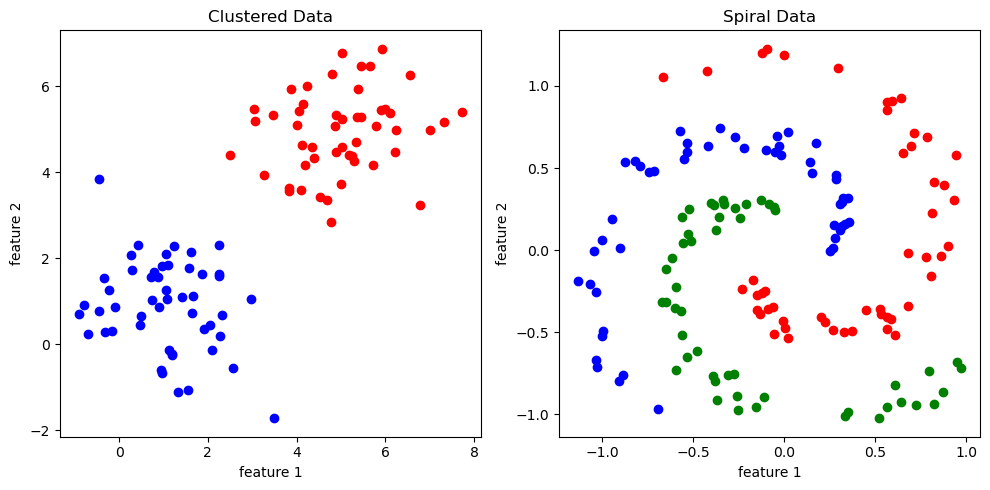

In [2]:
# Generate random data
N = 50
x1 = 1 + np.random.randn(N)
y1 = 1 + np.random.randn(N)
x2 = 5 + np.random.randn(N)
y2 = 5 + np.random.randn(N)

# Create the scatter plot
plt.figure(figsize=(10,5), tight_layout=True)
plt.subplot(1,2,1)
plt.scatter(x1, y1, c='b')
plt.scatter(x2, y2, c='r')

plt.title("Clustered Data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")

# Spiral scatter
plt.subplot(1,2,2)
colors = ['b', 'r', 'g']
for i in range(3):
    r = np.linspace(0.25,1.25,N) # radius
    theta = np.linspace(i*4,(i+1)*4,N) + np.random.randn(N)*0.25 # theta

    # Create some random data to scatter around the spiral
    scatter_x = r * np.cos(theta) 
    scatter_y = r * np.sin(theta) 

    plt.scatter(scatter_x, scatter_y, c=colors[i])

plt.title("Spiral Data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")

plt.show()

### Discussion 💬
- Where would you draw the boundary between the clusters? Why?
- Where would you draw the boundaries between the spiral clusters? Why?

This is the intuition for **support vector machines**!

We can automate this process of identifying boundaries between clusters using SVMs, even when the clusters get harder to separate and/or visualize.

### Definition
- in words
- in simple math: $w^Tx + b = 0$
    - $w$ is the normal vector to the hyperplane (the direction perpendicular to it)
    - $b$ is the offset or bias term representing the distance of the hyperplane from the origin along the normal vector 
    - further explain!

### Decision Boundary in Higher Dimensions
A hyperplane is a generalization of a plane that divide a space into two parts. In the case of a 2D space, all that's needed to divide the space is a line, as seen above in the graphed example. In the case of a 3D space, a plane is necessary to divide a space into two parts. A line on its own would not be able to divide the space into two distinct parts. Imagine trying to slice a cake by poking a needle through it! 

As the cake cannot be cut with a needle, higher dimensions need more than a plane to divide their spaces. In general, the dimension of a hyperplane is one less than that of the space being worked in.

For example, I slice a cake, classifying one half for you and one for me! The exposed face where the cake was cut is the decision boundary

### Pros + Cons
Some advantages of SVMs:
- SVMs are one of the most interpretable ML models, so they are easy to explain
- Computationally fast to train, test, and iterate

Some drawbacks:
- Very sensitive to picking the "right" kernel
- Prone to over fitting if the number of features is larger than the number of samples


## K-Nearest Neighbors
K-nearest neighbor algorithms are a kind of supervised classifier that classifies data based on whatever its nearest neighbors are. They are called k-nearest neighbor algorithms because the most important dial to change is **k**, the number of neighbors that are checked before determining which set to classify a new piece of data. Consider the green circle in the image below. If k is three, then it will be classified with the red triangles. But if k is five, it will be classified with the blue squares.

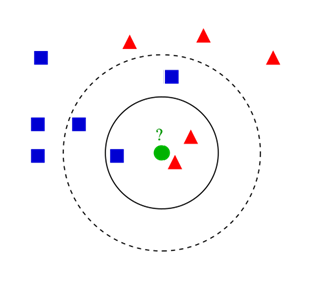

In words, the process of finding the k-nearest neighbors involves:
- Calculating the distance between a point and all other points
- Sorting all neighboring points from smallest to largest distance
- Extract the first *k* values from the sorted list of distances
- Determining the most common label or class that in the extracted *k* values

Here's some pseudo code for one way to do this:

```python
distances = {} #Create dictionary for the distances
for neighbor in data:
    distances[np.linalg.norm(new_data, neigbor.position)] = neighbor #key the dict by euclidean distance
all_distances = [distance for distance in distances.keys]
all_distances.sort()
k_distances = all_distances[:k+1] #only grab first k number of distances
k_neighbors = [distances[neighbor] for neighbor in distances if distance in k_distances]
```

### Beware ⚠️
- k-nearest neighbors requires careful selection of $k$ and the distance metric!
- Voting scheme have issues if the distribution is skewed ([source](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#:~:text=A%20drawback%20of%20the%20basic%20%22majority%20voting%22%20classification%20occurs%20when%20the%20class%20distribution%20is%20skewed.%20That%20is%2C%20examples%20of%20a%20more%20frequent%20class%20tend%20to%20dominate%20the%20prediction%20of%20the%20new%20example%2C%20because%20they%20tend%20to%20be%20common%20among%20the%20k%20nearest%20neighbors%20due%20to%20their%20large%20number.))

----
## Regression 📈

### Linear Regression
Linear regression algorithms take in labeled data and make a line a of best fit. These are very simple algorithms that assume that the data being studied trends in a straight line described by some $y = mx + b$. If the data does indeed follow a linear trend, then this is the algorithm to use!

Recall that we already saw one type of linear regression (ordinary least squares) in module 1!

<p align="left">
    <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20250729145749642923/Types-of-Linear-Regression.webp" width = "500">
</p>

There are also more complex versions like multiple linear regression, where the line would be described by some 
$$y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$$

where $x_1 ... x_n$ are the inputs and $w_0 ... w_n$ are the weights

Although there are more variables, this would still assume a linear relationship between each individual feature.

You will explore this further in the independent assignment this week!

### Notes
- If the data follows a linear trend, then linear regression is the simplest and most interpretable approach
- If the data is not *exactly* linear, then the model will underfit the data due to the assumption of linearity


## Nonlinear regression
For anything other than a linear relationship, nonlinear regression is needed.

Nonlinear regression algorithms fit a curved line to nonlinear data. They often use a polynomial fit or a radial basis function, which either guess at or simulate a nonlinear function, respectively. 

- Discussion from sklearn docs [here](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)
- Brief comments/overview from notes [here](https://www.geeksforgeeks.org/machine-learning/non-linear-regression-examples-ml/#nonlinear-regression-in-machine-learning)

## Performance Metrics for Linear and Nonlinear Regression
Performance for both linear and nonlinear regression functions are commonly measured by their mean absolute error (MAE) and mean squared error (MSE). 

Both performance metrics attempt to capture the quality of fit based on the **residuals** between the observations and the fitted line.
<p align="left">
    <img src = "https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600368657769-5BJU5FK86VZ6UXZGRC1M/Mean+Squared+Error.png?format=2500w" width = "400">
</p>

These quantities are defined as follows:
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

where $y_i$ is your input point, and $\hat{y_i}$ is your fit value

Note: MAE could artificially indicate a good fit if the scale of your y axis is small!

### Discussion 💬
- What happens to the overall MAE if there is an outlier (i.e. there exists a large $y_i - \hat{y}_i$ for some $i$)?
- What happens to the overall MSE if there is an outlier?
- Based on this, when would it be better to use MAE? When is it better to use MSE?